## Used Cars Selling Price - Linear Regression - Avalons

### ARTIFICIAL INTELLIGENCE CS - 617- A

### Project Phase 1 and 2

#### Team Name: Avalons

#### Team Members:
        1. Samba Chennamsetty - Team Head
        2. Arif Pasha Shaik
        3. Jagadeshwar Reddy Velma
        4. Sai Hrithik Peddi
        5. Vamsi Kiran Kakkera
        
#### GitHub Repository: https://github.com/samba-chennamsetty/used-car-selling-price-linear-regression

#### Project Name: Used cars selling price

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 1: Reading and Understanding the Data
    
    Let's start with the following steps:

     - Importing data using the pandas library
     - Understanding the structure of the data

In [3]:
car = pd.read_csv("UsedCarDetails.csv")

In [4]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### Adding new variable 

In [5]:
# adding new variable 'current-year' to the car dataframe to calculate car age.
car['current']= 2022

#### Adding new variable age column

In [6]:
# calculating current age.
car['age']=car['current']-car['year']

car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


### Step 2 : Data Cleaning and Preparation

   #### Drop all non required or repeative data

In [7]:
car.drop(['current','year','name'],axis=1,inplace=True)
car.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  4340 non-null   int64 
 1   km_driven      4340 non-null   int64 
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   age            4340 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [9]:
car.shape

(4340, 7)

In [10]:
car.describe()

,selling_price,km_driven,age
count,4.340000e+03,4340.000000,4340.000000
mean,5.041273e+05,66215.777419,8.909217
std,5.785487e+05,46644.102194,4.215344
min,2.000000e+04,1.000000,2.000000
25%,2.087498e+05,35000.000000,6.000000
50%,3.500000e+05,60000.000000,8.000000
75%,6.000000e+05,90000.000000,11.000000
max,8.900000e+06,806599.000000,30.000000


#### Points to note:

   - Dataset has 4340 rows and 7 columns.
   - Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
   - We will analyse and finalize whether to convert them to categorical or treat as integer.

#### DATA QUALITY CHECK

#### Check for NULL/MISSING values

In [11]:
# percentage of missing values in each column
round(100*(car.isnull().sum()/len(car)),2).sort_values(ascending = False)

selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
age              0.0
dtype: float64

In [12]:
# percentage of missing values in each row
round(100*(car.isnull().sum(axis=1)/len(car)),2).sort_values(ascending = False)

0       0.0
2899    0.0
2885    0.0
2886    0.0
2887    0.0
       ... 
1451    0.0
1452    0.0
1453    0.0
1454    0.0
4339    0.0
Length: 4340, dtype: float64

#### Findings

   - There are no missing / Null values either in columns or rows


#### Duplicate Check

In [13]:
car_dub=car.copy()
# Checking for duplicates and dropping the entire duplicate row if any
car_dub.drop_duplicates(subset=None, inplace=True)

In [14]:
car_dub.shape

(3498, 7)

In [15]:
car.shape

(4340, 7)

#### Insights

- The shape after running the drop duplicate command is not same as the original dataframe.



#### Assign non duplicates records to orginal record 

In [16]:
car=car_dub
car.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  3498 non-null   int64 
 1   km_driven      3498 non-null   int64 
 2   fuel           3498 non-null   object
 3   seller_type    3498 non-null   object
 4   transmission   3498 non-null   object
 5   owner          3498 non-null   object
 6   age            3498 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 218.6+ KB


In [18]:
car.shape

(3498, 7)

Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset.

In [19]:
for col in car:
    print(car[col].value_counts(ascending=False), '\n\n\n')

300000     122
250000     107
350000     104
550000      82
150000      81
          ... 
2595000      1
368000       1
248000       1
641000       1
865000       1
Name: selling_price, Length: 445, dtype: int64 



70000     202
80000     197
120000    192
60000     189
50000     171
         ... 
35925       1
40771       1
30500       1
55800       1
112198      1
Name: km_driven, Length: 770, dtype: int64 



Diesel      1762
Petrol      1676
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64 



Individual          2753
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64 



Manual       3187
Automatic     311
Name: transmission, dtype: int64 



First Owner             2157
Second Owner             964
Third Owner              285
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64 



5     336
10    332
7     327
8     315
9     290
4     285
6     273
11    244
12    205
13    167
3     156


#### Insights

- There seems to be no Junk/Unknown values in the entire dataset.

In [20]:
#To hold original data & column after duplicates are removed
car_o=car.copy()

In [21]:
# converting currency.
car['selling_price'] = car['selling_price'] / 83
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  3498 non-null   float64
 1   km_driven      3498 non-null   int64  
 2   fuel           3498 non-null   object 
 3   seller_type    3498 non-null   object 
 4   transmission   3498 non-null   object 
 5   owner          3498 non-null   object 
 6   age            3498 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 218.6+ KB


### Step 2 : Data Visualization

### Univaraite Analysis

In [22]:
# variables for plotting.
cont_col =[ 'selling_price','km_driven', 'age']

#### distplot

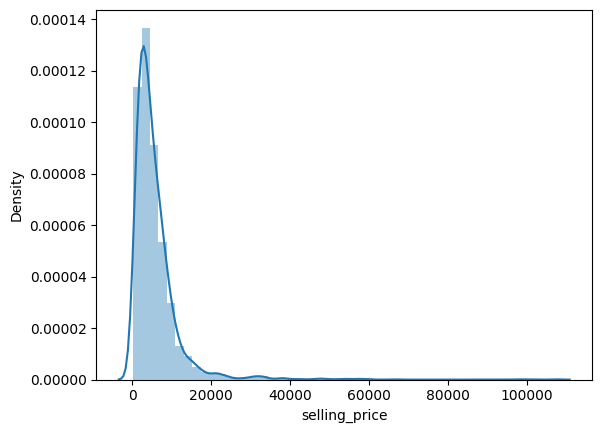

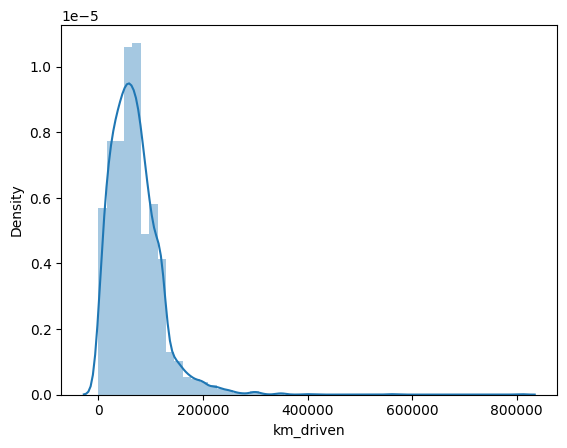

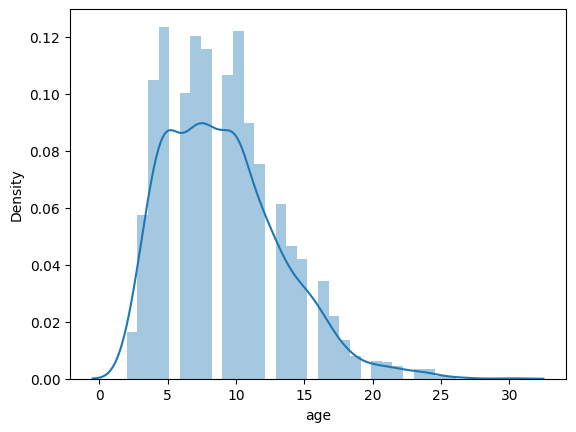

In [23]:
for i in cont_col:
    sns.distplot(car[i])
    plt.show()

#### Inference

- Selling Price and Km Driven have similar kind of distribution, some features are showing near by normal distribution while some are skewed.

#### boxplot

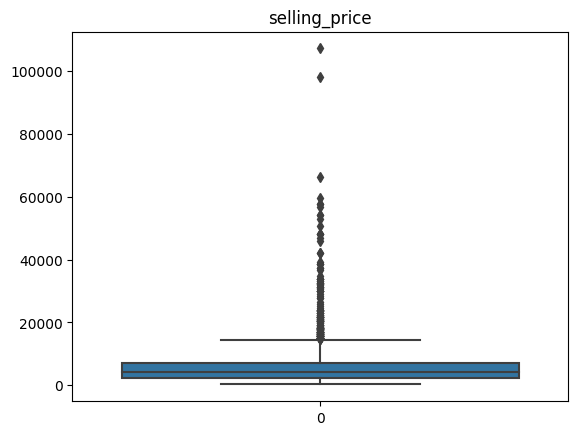

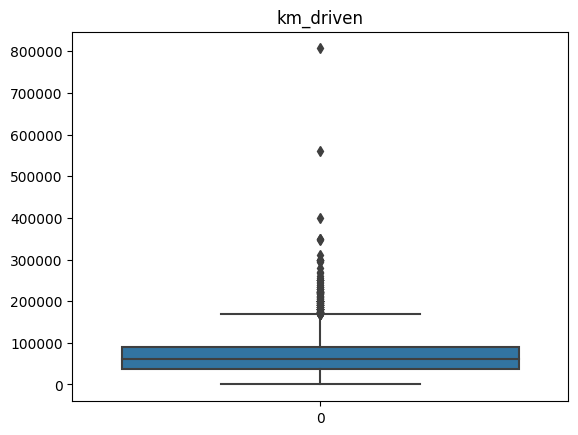

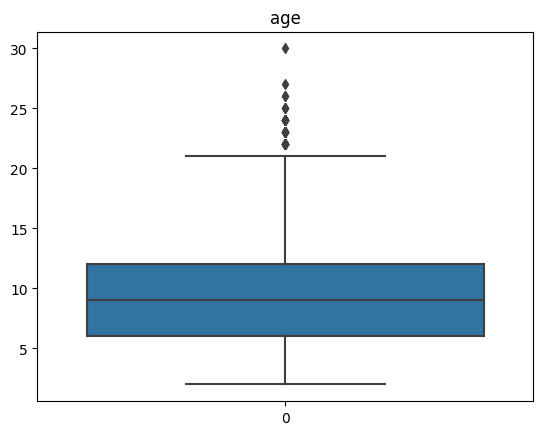

In [24]:
for i in cont_col:
    plt.title(i)
    sns.boxplot(car[i])
    plt.show()

### Bivaraite Analysis

In [25]:
# variables for plotting
cont_col =[ 'selling_price','km_driven', 'fuel']

#### scatter plot

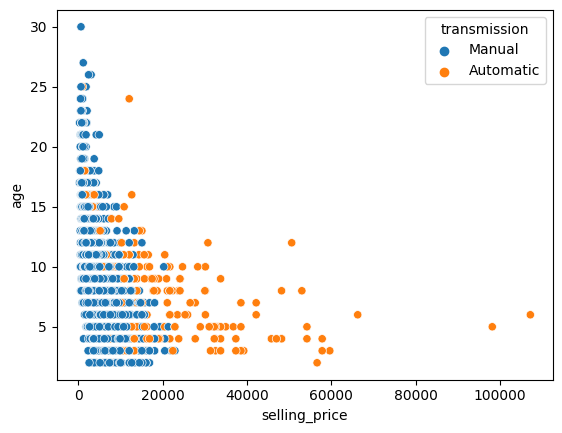

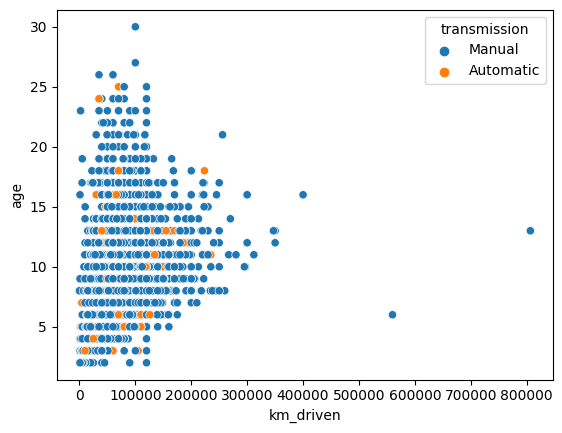

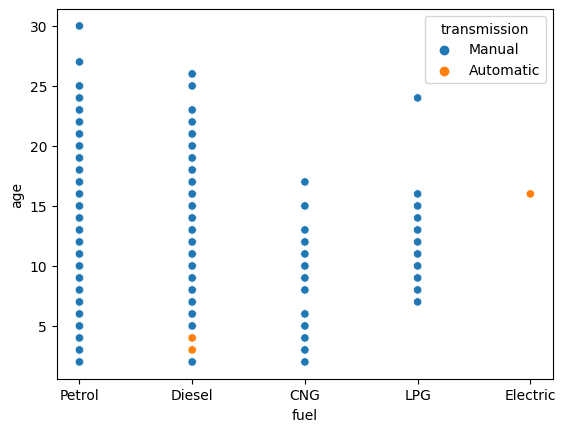

In [26]:
# plotting graph b/w count and continuous columns taking transmission as hue
for i in cont_col:
    sns.scatterplot(data = car[i], x = car[i], y = car['age'], hue=car['transmission'])
    plt.show()

#### pair plot

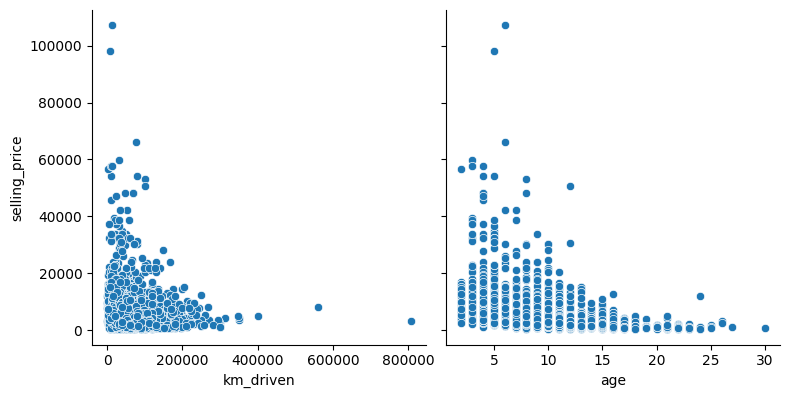

In [27]:
def pp(x,y):
    sns.pairplot(car, x_vars=[x,y], y_vars='selling_price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('km_driven', 'age')
